# Modulation of signals

## Amplitude modulation

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy

## Зачем нужна модуляция?


Какой должна быть длинна антенны для передачи голоса человека через ЭМ поле?


>1. < 1 mm
>2. ∼ cm
>3. ∼ m
>4. ∼ km
>5. \> 100 km


---
Длинна волны $\lambda = \frac{c}{f} $. Низкой частоте колебания  (200 Hz) соответствует наибольшая длина: 

$$\lambda = \frac{c}{f} = \frac{3 \times 10^8 m/s }{3000 Hz} = 1500 Км $$

Выходит нужна антенна порядка многих километров чтобы она могла излучать или принимать волны такой частоты.
Но что если можно замодулировать одни волны другими которые удобнее передавать?


In [32]:
lambd = 3e8 / 2000e6
print(lambd)

0.15


In [33]:
def plot_signal_in_td(signal, N_samples="all",color="b",type="plot"):
    if N_samples == "all":
        N_samples = len(signal)
    else:
        N_samples = int(N_samples)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    if type == "plot":
        plt.plot(t[0:N_samples],signal[0:N_samples],c=color)  
    else:
        plt.scatter(t[0:N_samples],signal[0:N_samples],c=color, s =1)    
    

In [36]:
f = 4 # Signal
fc = 200 # Carrier
# sampling rate
N = 5000
# sampling interval
ts = 1.0 / N
stop_time = 10
t = np.arange(0,stop_time,ts)

sin_list = np.array([math.sin(2*math.pi*f*n) for n in range(N)])
#sin_list_np = np.array(sin_list)
def get_sine(f,A=1,phase=0,N=1000):
    sin_wave = A*np.sin(2*np.pi*f*t + phase*np.array([1]*len(t)))
    return sin_wave

In [37]:
s1 = get_sine(f,phase=0,N=N)
s2 = get_sine(fc,phase=np.pi/2,N=N) # Carrier

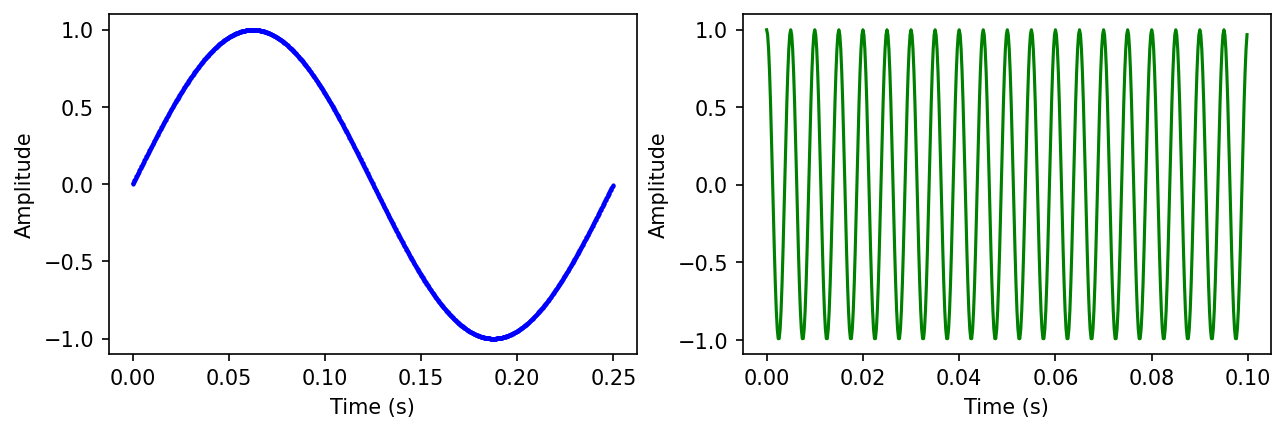

In [43]:

fig=plt.figure(figsize=(10,3), dpi= 150, facecolor='w', edgecolor='k')


plt.subplot(121)
plot_signal_in_td(s1,type="scatter", N_samples = N/4 )
plt.subplot(122)
plot_signal_in_td(s2,type="plot", N_samples = N/10, color = "g" )

In [49]:
# Playing the sound!
import sounddevice as sd
import time

#variables
samplfreq = N   #the sampling frequency of your data (mine=100Hz, yours=44100)
factor = 20       #incr./decr frequency (speed up / slow down by a factor) (normal speed = 1)

sd.play( s1 / np.max(np.abs(s1)), samplfreq*factor*2)
sd.wait()
sd.play( s1 / np.max(np.abs(s1)), samplfreq*factor*2)
sd.wait()
time.sleep(1)
sd.play( s2 / np.max(np.abs(s2)), samplfreq*factor)


In [50]:
# Get MODULATION GOING!
s3 = s1 * s2

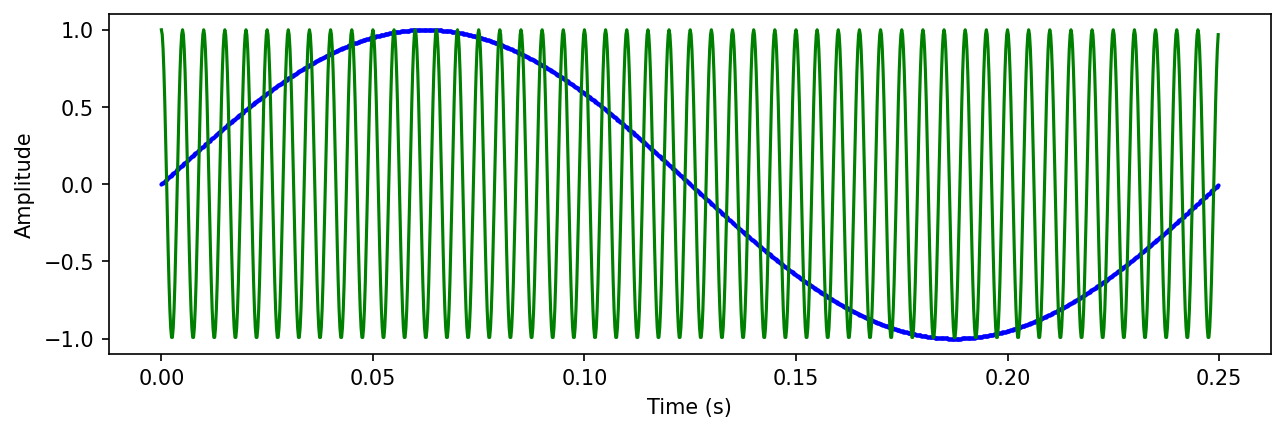

In [51]:
fig=plt.figure(figsize=(10,3), dpi= 150)
plot_signal_in_td(s1,type="scatter", N_samples = N/4 )
plot_signal_in_td(s2,type="plot", N_samples = N/4, color = "g" )

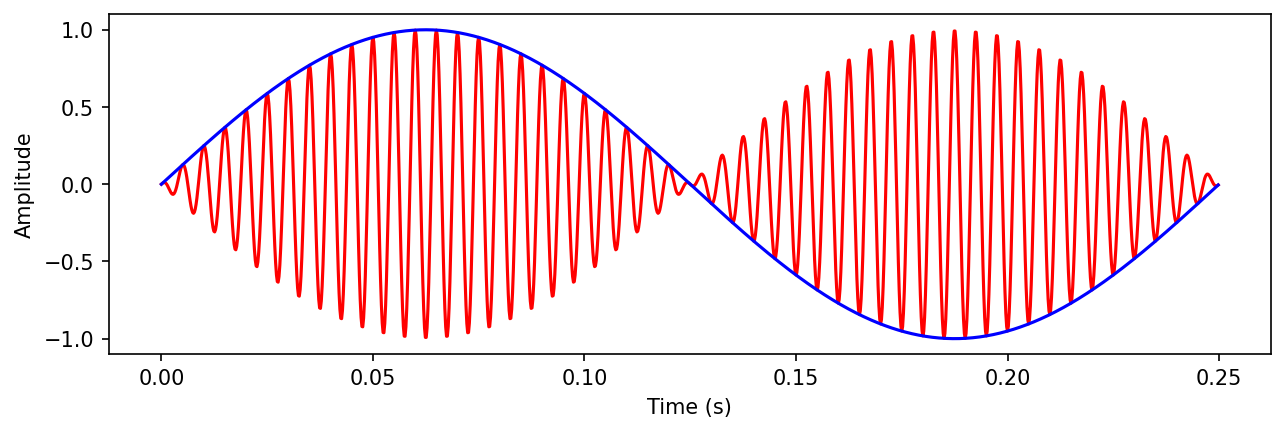

In [52]:

fig=plt.figure(figsize=(10,3), dpi= 150, facecolor='w', edgecolor='k')
ax = plt.axes()
num_p = int(N/4)
#ax.scatter(t[0:num_p],get_sine(f)[0:num_p],s=2)
# ax.scatter(t,get_sine(f),s=1)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
ax.plot(t[0:num_p],s3[0:num_p],c="r")
ax.plot(t[0:num_p],s1[0:num_p],c="b")

In [54]:
# FFT guide in python: https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.04-FFT-in-Python.html
from numpy.fft import fft, ifft

fft_s1 = fft(s1)
fft_s2 = fft(s2)
fft_s3 = fft(s3)

# fft_N = len(fft_s1)
# n = np.arange(fft_N)
# T = fft_N/N
# freq = n/T

####

N_fft = len(fft_s1)
n = np.arange(N_fft)
T = N_fft/N
freq = n/T 

In [25]:
len(fft_s1)

50000

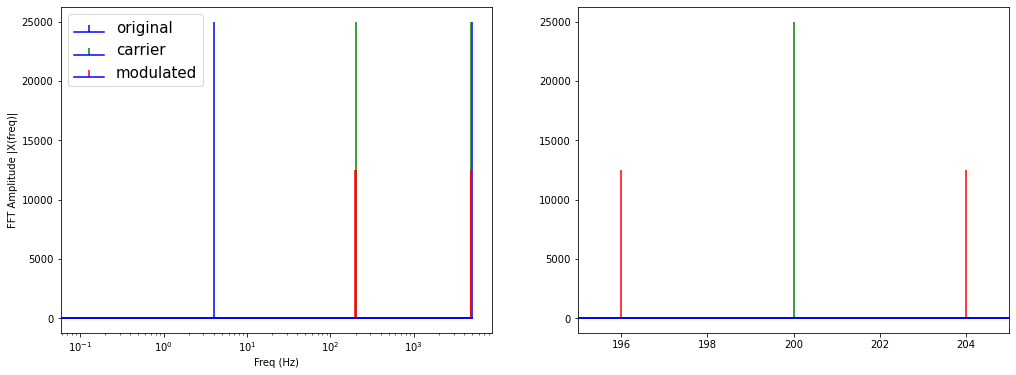

In [55]:
plt.figure(figsize = (17, 6))
plt.subplot(121)

plt.stem(freq, np.abs(fft_s1), linefmt='b', markerfmt=" ", basefmt="-b",label="original", use_line_collection=True)
plt.stem(freq, np.abs(fft_s2), linefmt='g', markerfmt=" ", basefmt="-b",label="carrier", use_line_collection=True)
plt.stem(freq, np.abs(fft_s3), linefmt='r', markerfmt=" ", basefmt="-b", label="modulated", use_line_collection=True)
plt.legend(loc=2, prop={'size': 15})
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

plt.xscale("log")
plt.subplot(122)
# plt.plot(t, ifft(X), 'r')
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')
# plt.tight_layout()
plt.xlim(195, 205)
plt.stem(freq, np.abs(fft_s1), linefmt='b', markerfmt=" ", basefmt="-b",label="original")
plt.stem(freq, np.abs(fft_s2), linefmt='g', markerfmt=" ", basefmt="-b",label="carrier")
plt.stem(freq, np.abs(fft_s3), linefmt='r', markerfmt=" ", basefmt="-b", label="modulated")


plt.show()

## Demodulation

In [56]:
s_d = s3 * s2

fft_s_d = fft(s_d)

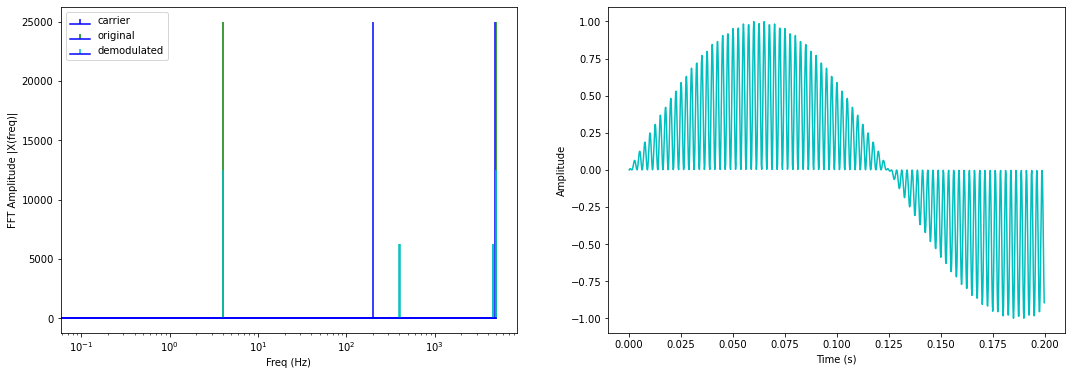

In [60]:
plt.figure(figsize = (18, 6))
plt.subplot(121)

plt.stem(freq, np.abs(fft_s2), linefmt='b', markerfmt=" ", basefmt="-b",label="carrier")
plt.stem(freq, np.abs(fft_s1), linefmt='g', markerfmt=" ", basefmt="-b",label="original")
#plt.stem(freq, np.abs(fft_s1), linefmt='r', markerfmt=" ", basefmt="-b",label="modulated")
plt.stem(freq, np.abs(fft_s_d), linefmt='c', markerfmt=" ", basefmt="-b",label="demodulated")
plt.legend()
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
# plt.xlim(95, 105)
plt.xscale("log")
plt.subplot(122)
# plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.plot(t[0:1000],s_d[0:1000],c="c")
plt.show()

## Low pass

## 2. Low-pass filter transfer function
[Source](https://www.youtube.com/watch?v=HJ-C4Incgpw&ab_channel=CurioRes)
* A cutoff frequency is selected and the transfer function for the low-pass filter is computed using <code>signal.TransferFunction</code>
* The low-pass filter transfer function is
$$H(s) = \frac{\omega_0}{s + \omega_0}$$
* The Bode plot shows the frequency response of $H$ by plotting the magnitude and phase of the frequency response
* Low frequencies are not attenuated (this is the *pass band*)
* High frequencies are attenutated (this is the *stop band*)

In [61]:
from scipy import signal

# Initiate filter
cutoff = 2 * np.pi * (f*2)

num = [cutoff]
denum = [1,cutoff]
low_pass = signal.TransferFunction(num,denum)

# Plotting the filter


signalFreq = [2,1e3]; # Cycles / second
signalMag = [1,0.2]; # magnitude of each sine
# Generate the bode plot
w = np.logspace( np.log10(min(signalFreq)*2*np.pi/10), np.log10(max(signalFreq)*2*np.pi*10), 500 )
w, mag, phase = signal.bode(low_pass,w)


dt = 1.0/N;
discreteLowPass = low_pass.to_discrete(dt,method='gbt',alpha=0.5)
print(discreteLowPass)

TransferFunctionDiscrete(
array([0.00500141, 0.00500141]),
array([ 1.        , -0.98999718]),
dt: 0.0002
)


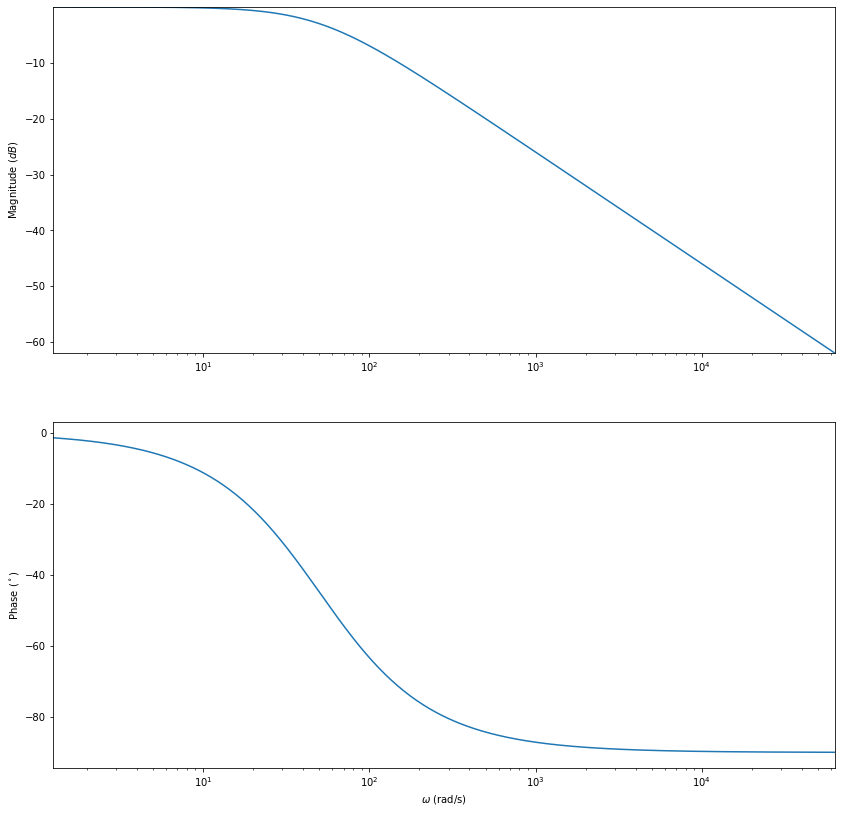

In [110]:
# Magnitude plot
# plt.figure()
plt.figure(figsize = (14, 14))
# fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
# plt.subplots(2, 1, sharex=True)
plt.subplot(211)
plt.semilogx(w, mag)
# for sf in signalFreq:
#     plt.semilogx([sf*2*np.pi,sf*2*np.pi],[min(mag),max(mag)],'k:')
plt.ylabel("Magnitude ($dB$)")
plt.xlim([min(w),max(w)])
plt.ylim([min(mag),max(mag)])

# Phase plot
# plt.figure()
plt.subplot(212)
plt.semilogx(w, phase)  # Bode phase plot
plt.ylabel("Phase ($^\circ$)")
plt.xlabel("$\omega$ (rad/s)")
plt.xlim([min(w),max(w)])
plt.show()


In [62]:
tout, s_out, x = signal.lsim(low_pass, s_d, t)

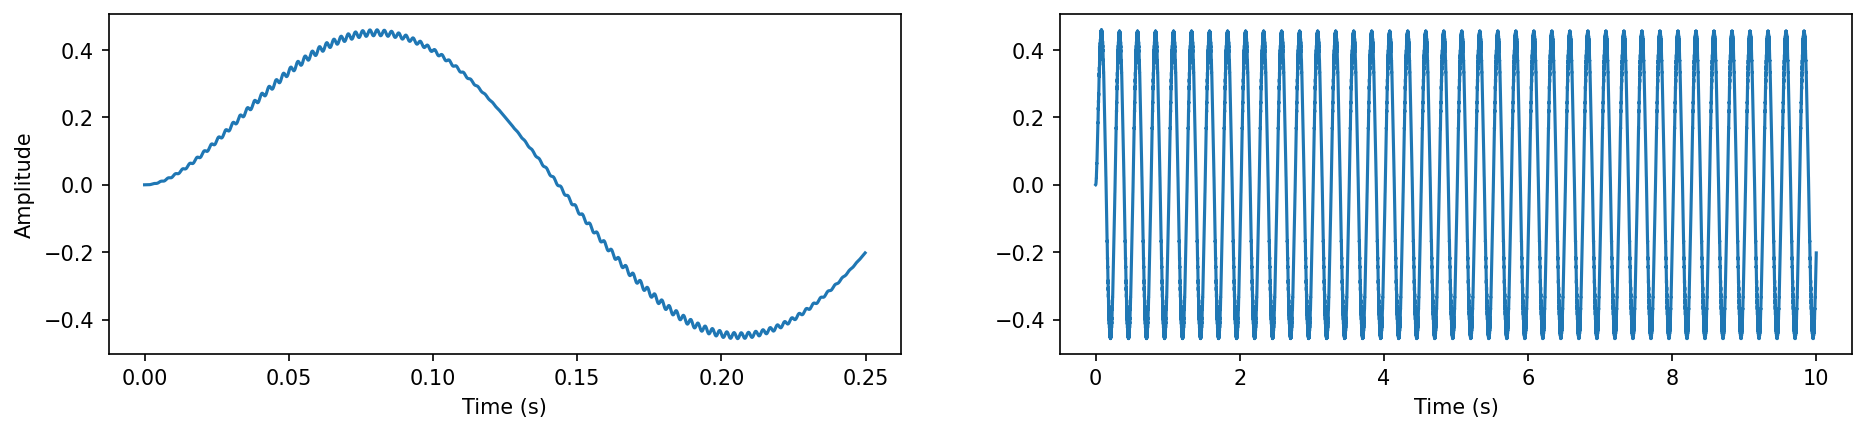

In [123]:

fig=plt.figure(figsize=(15,3), dpi= 150, facecolor='w', edgecolor='k')
# ax = plt.axes()
plt.subplot(121)
num_p = int(N/4)

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.plot(tout[0:num_p], s_out[0:num_p])
plt.subplot(122)
plt.xlabel('Time (s)')
plt.plot(tout, s_out)

In [64]:
# Playing the sound again!
import sounddevice as sd
import time

#variables
samplfreq = N   #the sampling frequency of your data (mine=100Hz, yours=44100)
factor = 20       #incr./decr frequency (speed up / slow down by a factor) (normal speed = 1)

sd.play( s1 / np.max(np.abs(s1)), samplfreq*factor)
sd.wait()
sd.play( s1 / np.max(np.abs(s1)), samplfreq*factor)
sd.wait()
time.sleep(3)
sd.play( s_d / np.max(np.abs(s_d)), samplfreq*factor)
sd.wait()
sd.play( s_d / np.max(np.abs(s_d)), samplfreq*factor)


[1, 25000.000000000065]


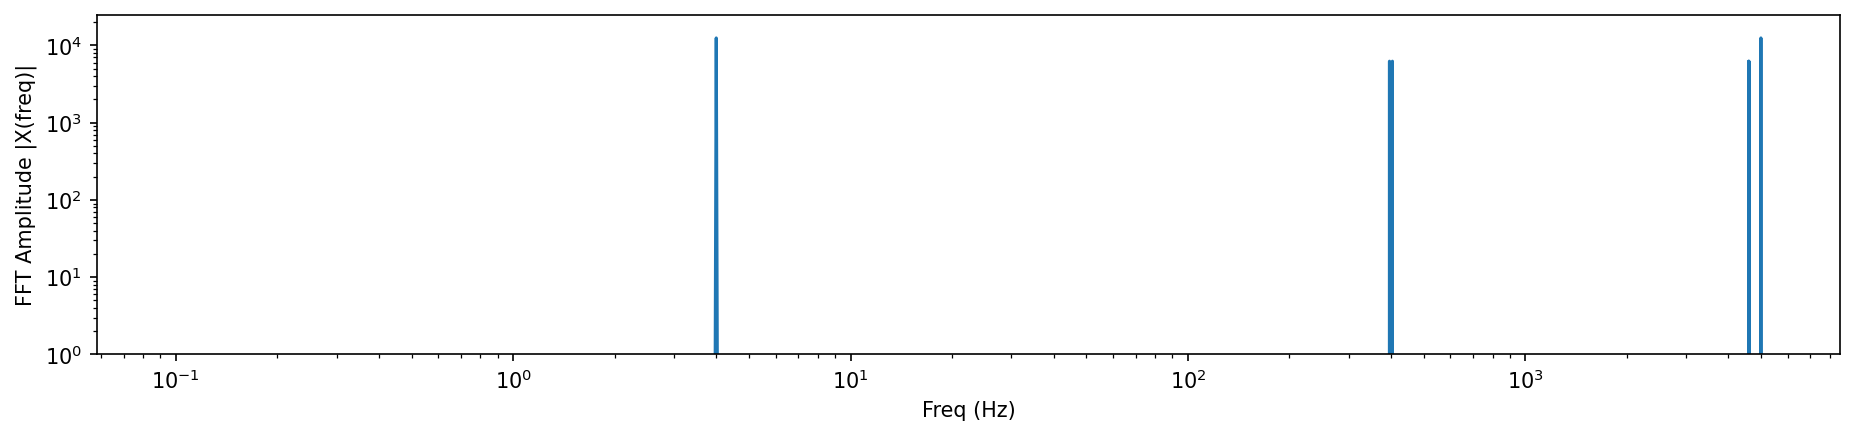

In [190]:
def plot_fft(signal_fft,fstart=0,fstop=400):
    # Number of samplepoints
    num_of_sample_points = N*ts
    # sample spacing
    T = 1.0 / N
    
    N_fft = len(signal_fft)
    n = np.arange(N_fft)
    T = N_fft/N
    freq = n/T 
    plt.xlabel('Freq (Hz)')
    plt.ylabel('FFT Amplitude |X(freq)|')
    plt.xscale("log")
    plt.yscale("log")
    plt.ylim([1,abs(2*max(np.abs(signal_fft)))])
    print([1,abs(2*max(np.abs(signal_fft)))])
    #plt.ylim([min(mag),max(mag)])
    plt.plot(freq, np.abs(signal_fft))

fig=plt.figure(figsize=(15,3), dpi= 150, facecolor='w', edgecolor='k')
fft_s_d = fft(s_d)    
plot_fft(fft_s_d)



Сигнал в общем виде
$$ x(t) = A sin(\omega * t  + phase ) $$